In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import time
from pprint import pprint
from sqlalchemy import create_engine
import datashader as ds
import matplotlib.pyplot as plt
from colorcet import fire, blues
from datashader.utils import export_image
import seaborn as sns
from datashader import transfer_functions as tf

In [2]:
POSTGRES_USERNAME = "sahil"
POSTGRES_PASSWORD = "zxcvbnm"
POSTGRES_DBNAME = "postgres"
POSTGRES_DB_ADDRESS = "localhost"

url = 'postgresql://{}:{}@{}:{}/{}'.format(POSTGRES_USERNAME, POSTGRES_PASSWORD, POSTGRES_DB_ADDRESS, 5432, POSTGRES_DBNAME)
engine = create_engine(url)

In [3]:
#select pdpi of 2016-2017
pdpi_tables = pd.read_sql_query("select tablename from pg_tables where tablename ~* 'pdpi_(2016|2017).*' order by tablename asc;"
                  , con=engine)

pdpi_tables.head()

tablename
0  pdpi_201601
1  pdpi_201602
2  pdpi_201603
3  pdpi_201604
4  pdpi_201605

In [4]:
addr_index = pd.read_sql_table("addr_index", engine)
addr_index.head()

index practice                   postcode   latitude  longitude  \
0      0   A81001  TS18 1HU                   54.561625  -1.318986   
1      1   A81002  TS18 2AW                   54.569163  -1.313928   
2      2   A81003  TS26 8DB                   54.685239  -1.217599   
3      3   A81004  TS1 3BE                    54.571809  -1.232274   
4      4   A81005  TS14 7DJ                   54.532605  -1.055428   

               x             y  
0 -146828.849883  7.277247e+06  
1 -146265.846882  7.278694e+06  
2 -135542.500670  7.301016e+06  
3 -137176.153683  7.279203e+06  
4 -117489.720853  7.271678e+06

In [5]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

In [6]:
addr_index["postcode"] = addr_index["postcode"].apply(remove_whitespace)
addr_index.head()

index practice postcode   latitude  longitude              x             y
0      0   A81001  TS181HU  54.561625  -1.318986 -146828.849883  7.277247e+06
1      1   A81002  TS182AW  54.569163  -1.313928 -146265.846882  7.278694e+06
2      2   A81003  TS268DB  54.685239  -1.217599 -135542.500670  7.301016e+06
3      3   A81004   TS13BE  54.571809  -1.232274 -137176.153683  7.279203e+06
4      4   A81005  TS147DJ  54.532605  -1.055428 -117489.720853  7.271678e+06

In [7]:
post_code_pop = pd.read_sql_table("postcodes_population", engine)
post_code_pop.head()

postcode   latitude  longitude  eastings  northings       ward  \
0  AB101AA  57.148235  -2.096648    394251     806376  S13002483   
1  AB101AB  57.149079  -2.096964    394232     806470  S13002483   
2  AB101AF  57.148710  -2.097806    394181     806429  S13002483   
3  AB101AG  57.148235  -2.096648    394251     806376  S13002483   
4  AB101AH  57.148084  -2.094665    394371     806359  S13002483   

          county  population postcode2  
0  Aberdeenshire           0      None  
1  Aberdeenshire           0      None  
2  Aberdeenshire           0      None  
3  Aberdeenshire           0      None  
4  Aberdeenshire           0      None

In [8]:
merged_df = pd.merge(addr_index, post_code_pop[["postcode", "county"]], how="left", on="postcode")

In [9]:
merged_df.head()

index practice postcode   latitude  longitude              x             y  \
0      0   A81001  TS181HU  54.561625  -1.318986 -146828.849883  7.277247e+06   
1      1   A81002  TS182AW  54.569163  -1.313928 -146265.846882  7.278694e+06   
2      2   A81003  TS268DB  54.685239  -1.217599 -135542.500670  7.301016e+06   
3      3   A81004   TS13BE  54.571809  -1.232274 -137176.153683  7.279203e+06   
4      4   A81005  TS147DJ  54.532605  -1.055428 -117489.720853  7.271678e+06   

                    county  
0                   Durham  
1                   Durham  
2                   Durham  
3  Yorkshire, North Riding  
4  Yorkshire, North Riding

In [ ]:
# dont rerun this cell
# table was already created
merged_df.to_sql("addr_index2", engine)

In [10]:
addr_index2 = merged_df
del merged_df
addr_index2.head()

index practice postcode   latitude  longitude              x             y  \
0      0   A81001  TS181HU  54.561625  -1.318986 -146828.849883  7.277247e+06   
1      1   A81002  TS182AW  54.569163  -1.313928 -146265.846882  7.278694e+06   
2      2   A81003  TS268DB  54.685239  -1.217599 -135542.500670  7.301016e+06   
3      3   A81004   TS13BE  54.571809  -1.232274 -137176.153683  7.279203e+06   
4      4   A81005  TS147DJ  54.532605  -1.055428 -117489.720853  7.271678e+06   

                    county  
0                   Durham  
1                   Durham  
2                   Durham  
3  Yorkshire, North Riding  
4  Yorkshire, North Riding

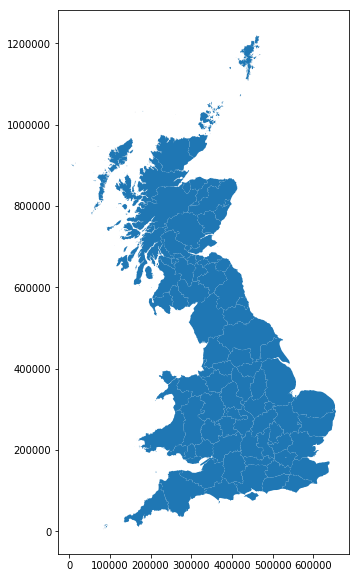

In [11]:
import geopandas as gpd
# boundry_shape_file = gpd.read_file("/home/sahil/Documents/code/masters_thesis/Prescribing Data/british_counties_epsg_4326.shp")
boundry_shape_file = gpd.read_file("/home/sahil/Documents/code/masters_thesis/Prescribing Data/Boundary-line-ceremonial-counties_region.shp")
boundry_shape_file.shape


boundry_shape_file.plot(figsize=(20,10))


In [12]:
boundry_shape_file["Name"] = boundry_shape_file["Name"].str.lower().apply(remove_whitespace)
boundry_shape_file.head()

Name         Area_Descr  \
0     bedfordshire  Ceremonial County   
1        berkshire  Ceremonial County   
2          bristol  Ceremonial County   
3  buckinghamshire  Ceremonial County   
4   cambridgeshire  Ceremonial County   

                                            geometry  
0  POLYGON Z ((527179.0038715855 248224.995589356...  
1  POLYGON Z ((504919.2022824243 178392.095049202...  
2  POLYGON Z ((345022.402546348 180397.2010935674...  
3  POLYGON Z ((505704.7999491982 185453.303799222...  
4  POLYGON Z ((571833.3973087885 261707.896149217...

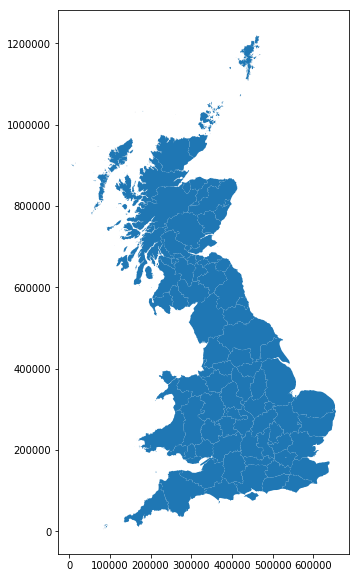

In [13]:
boundry_shape_file.plot(figsize=(20,10))

select practice from pdpi_201601 where chapter like '03' and section like '09';
0.17797112464904785
                   Name  freq_of_occurance  period
0            lancashire               3346  201601
1             middlesex               2360  201601
2  yorkshire,westriding               2043  201601
3         staffordshire               1763  201601
4                 essex               1469  201601
(91, 5)
select practice from pdpi_201602 where chapter like '03' and section like '09';
0.1615128517150879
                   Name  freq_of_occurance  period
0            lancashire               3192  201602
1             middlesex               2335  201602
2  yorkshire,westriding               1971  201602
3         staffordshire               1711  201602
4                 essex               1441  201602
(91, 5)
select practice from pdpi_201603 where chapter like '03' and section like '09';
0.17351889610290527
                   Name  freq_of_occurance  period
0            lancashir

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


select practice from pdpi_201608 where chapter like '03' and section like '09';
0.12268567085266113
                   Name  freq_of_occurance  period
0            lancashire               2152  201608
1             middlesex               1419  201608
2  yorkshire,westriding               1346  201608
3         staffordshire               1258  201608
4                surrey                918  201608
(91, 5)
select practice from pdpi_201609 where chapter like '03' and section like '09';
0.11893892288208008
                   Name  freq_of_occurance  period
0            lancashire               2214  201609
1             middlesex               1594  201609
2  yorkshire,westriding               1372  201609
3         staffordshire               1301  201609
4                surrey                978  201609
(91, 5)
select practice from pdpi_201610 where chapter like '03' and section like '09';
0.11654281616210938
                   Name  freq_of_occurance  period
0            lancashi

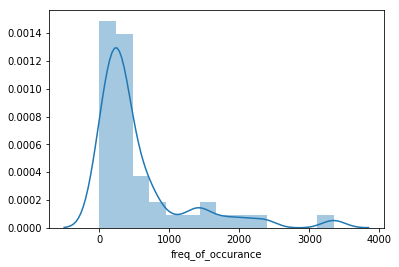

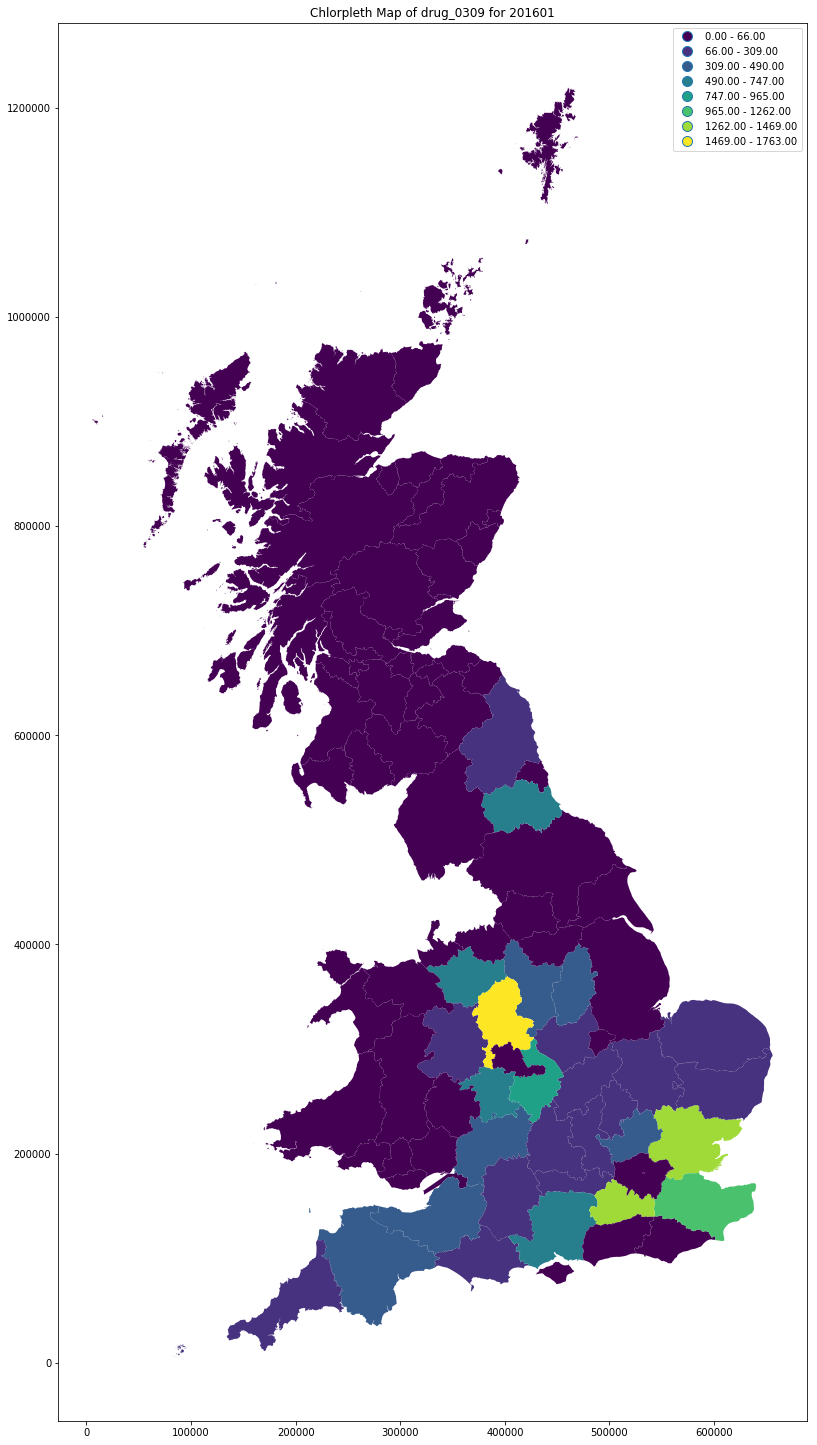

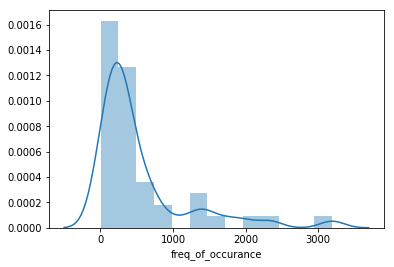

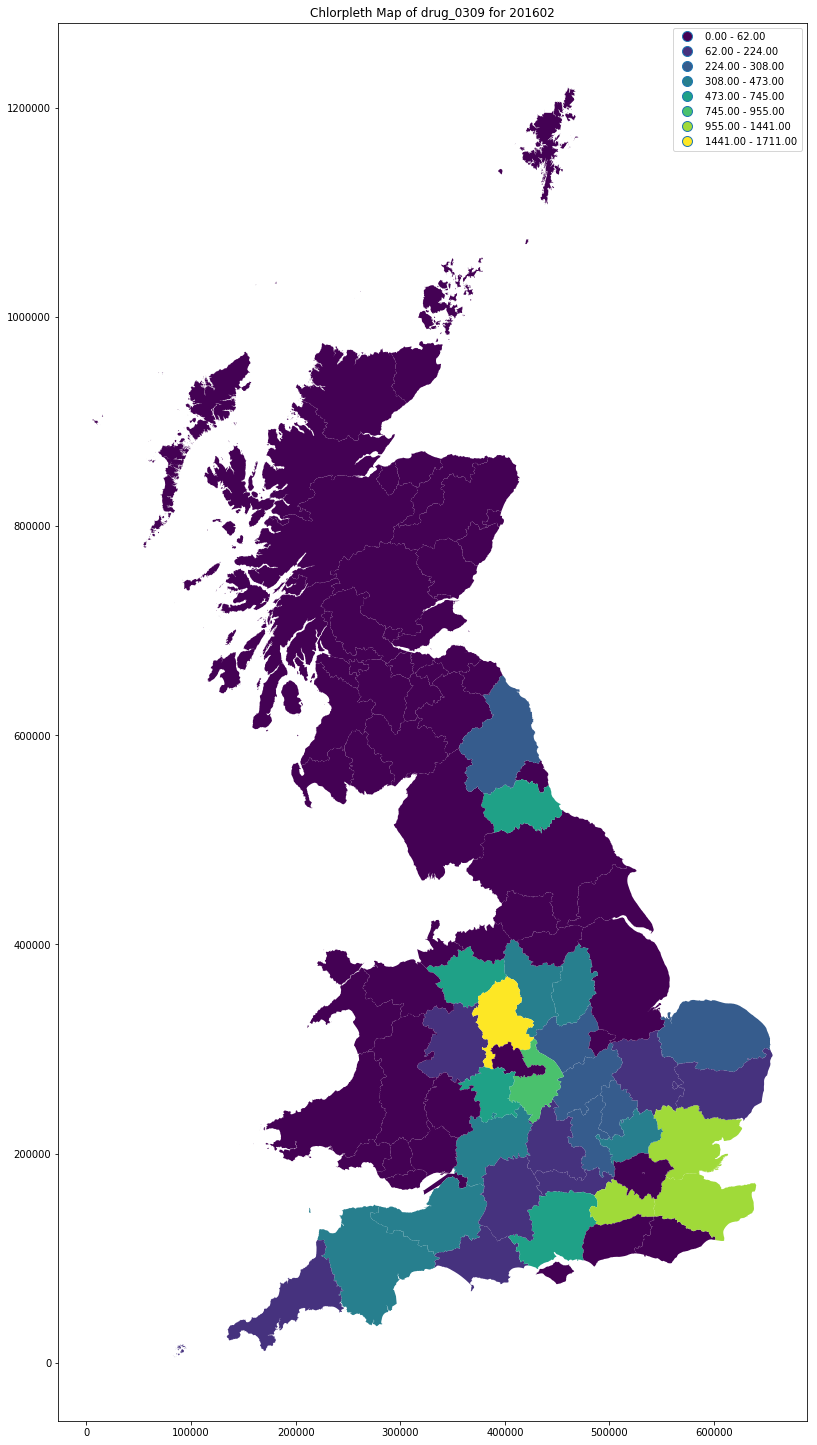

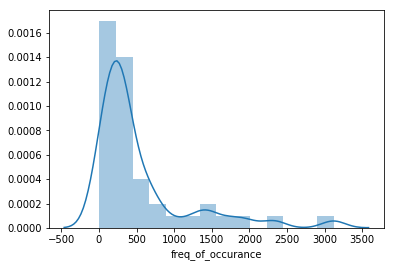

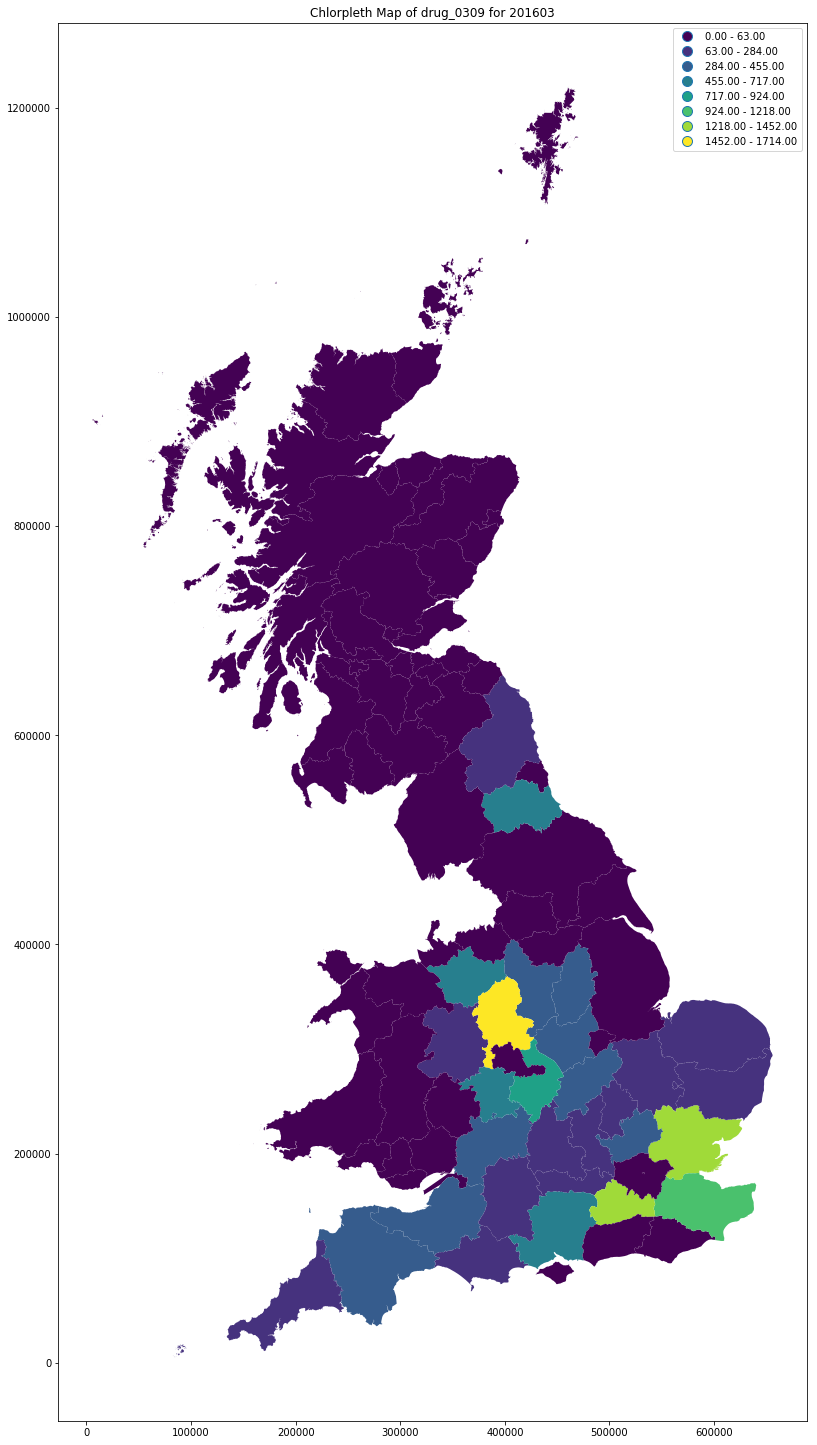

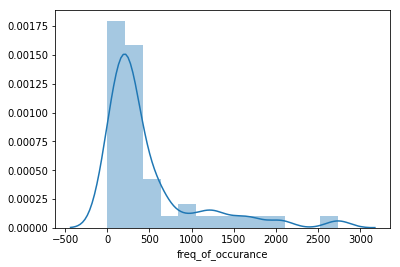

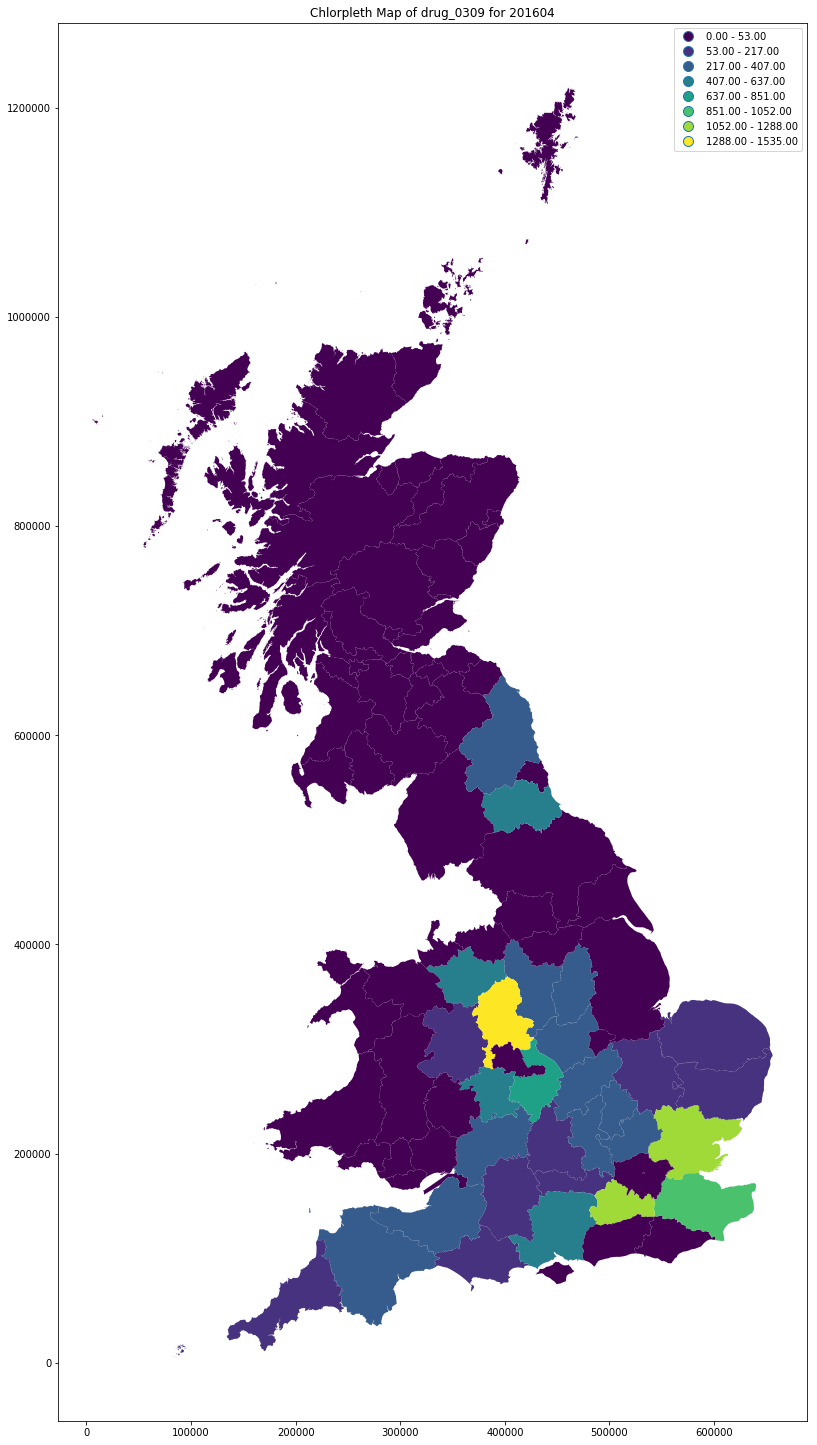

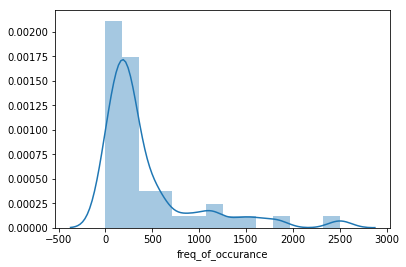

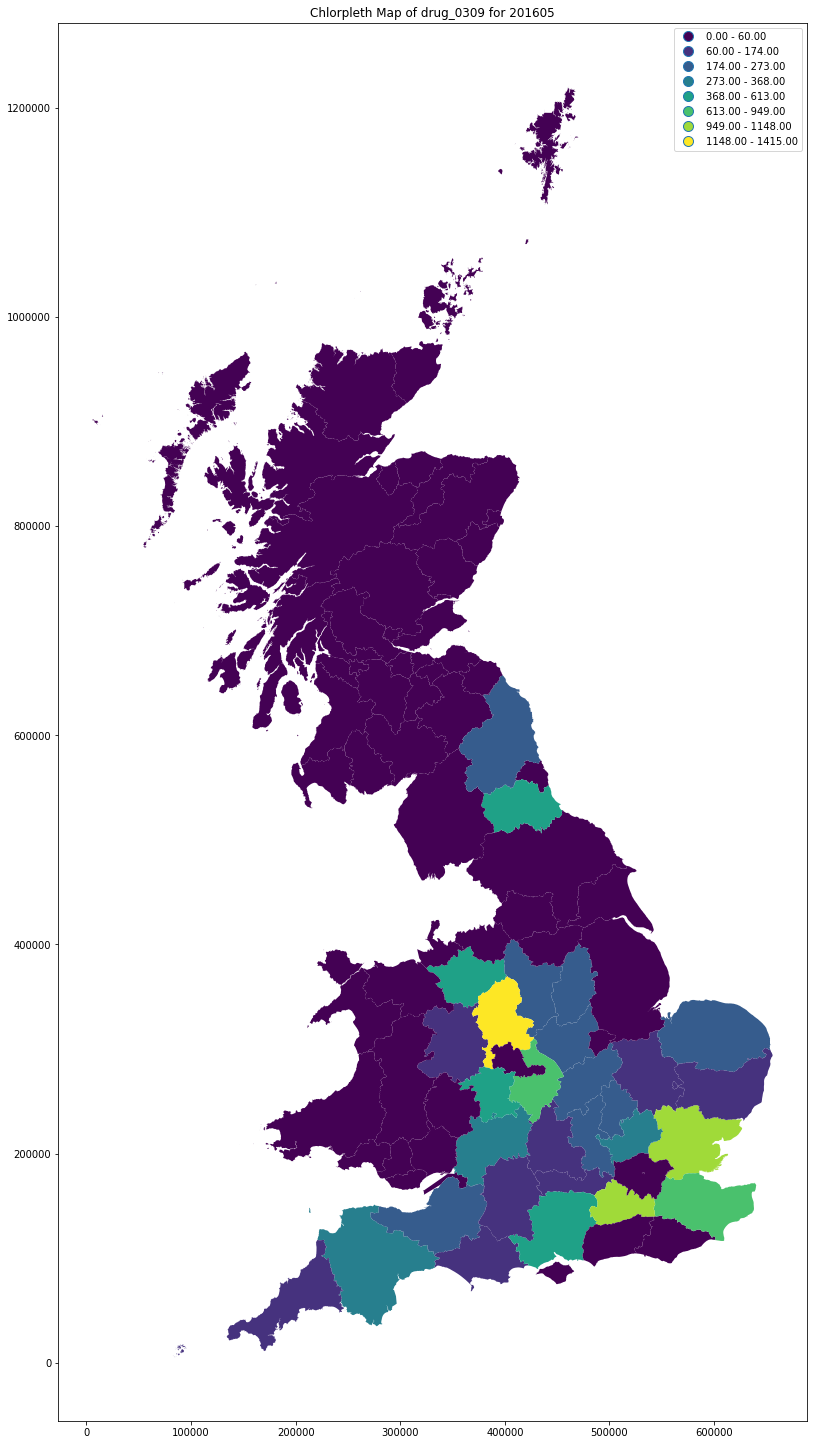

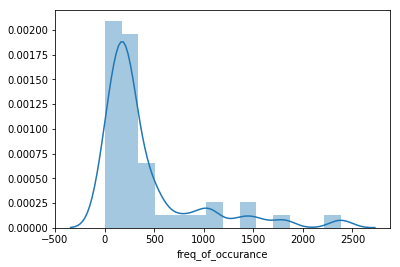

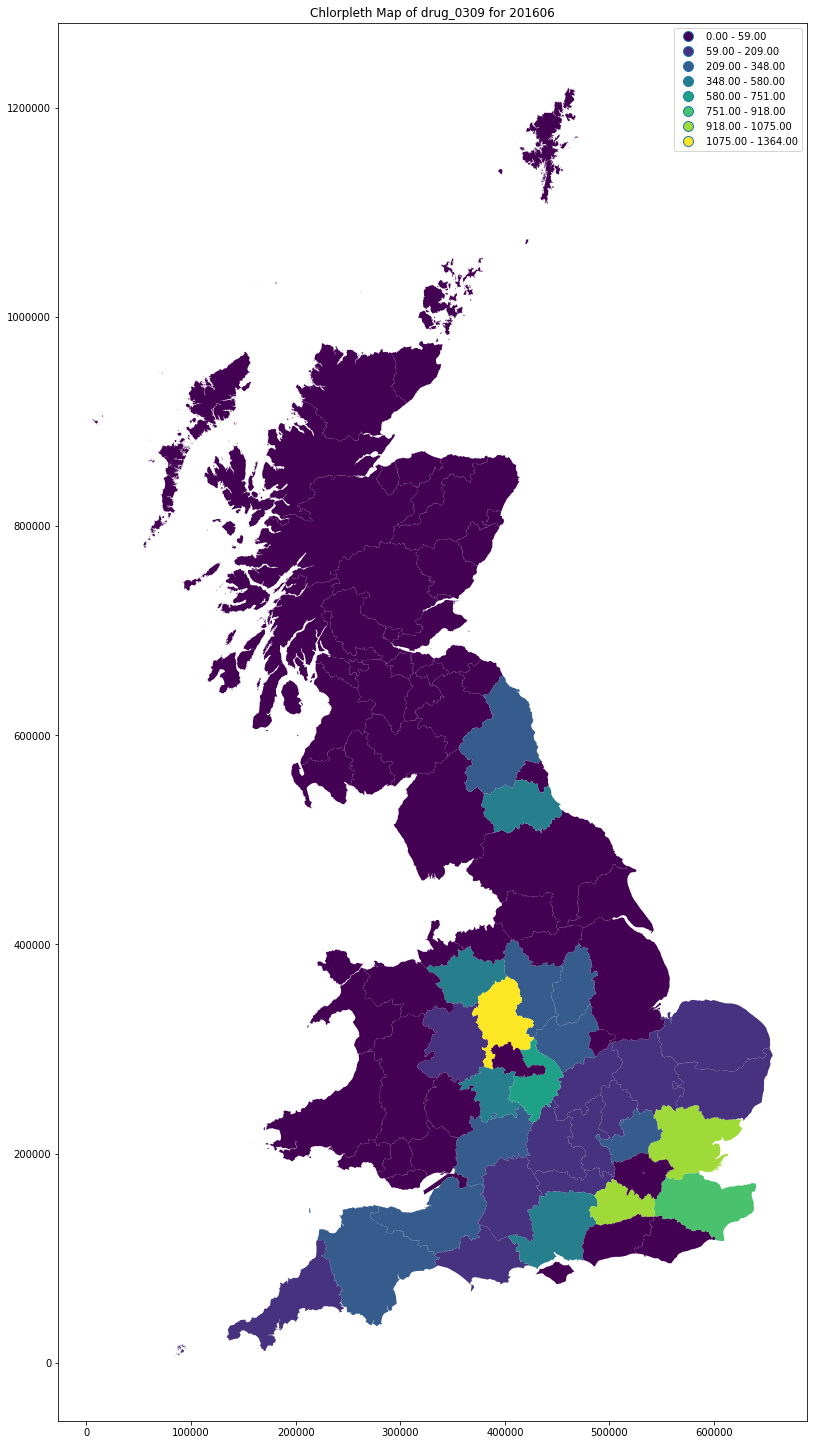

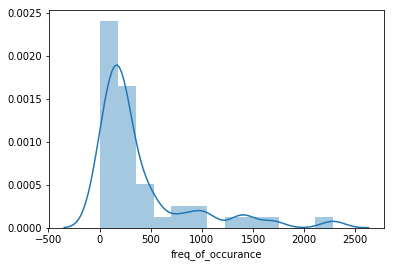

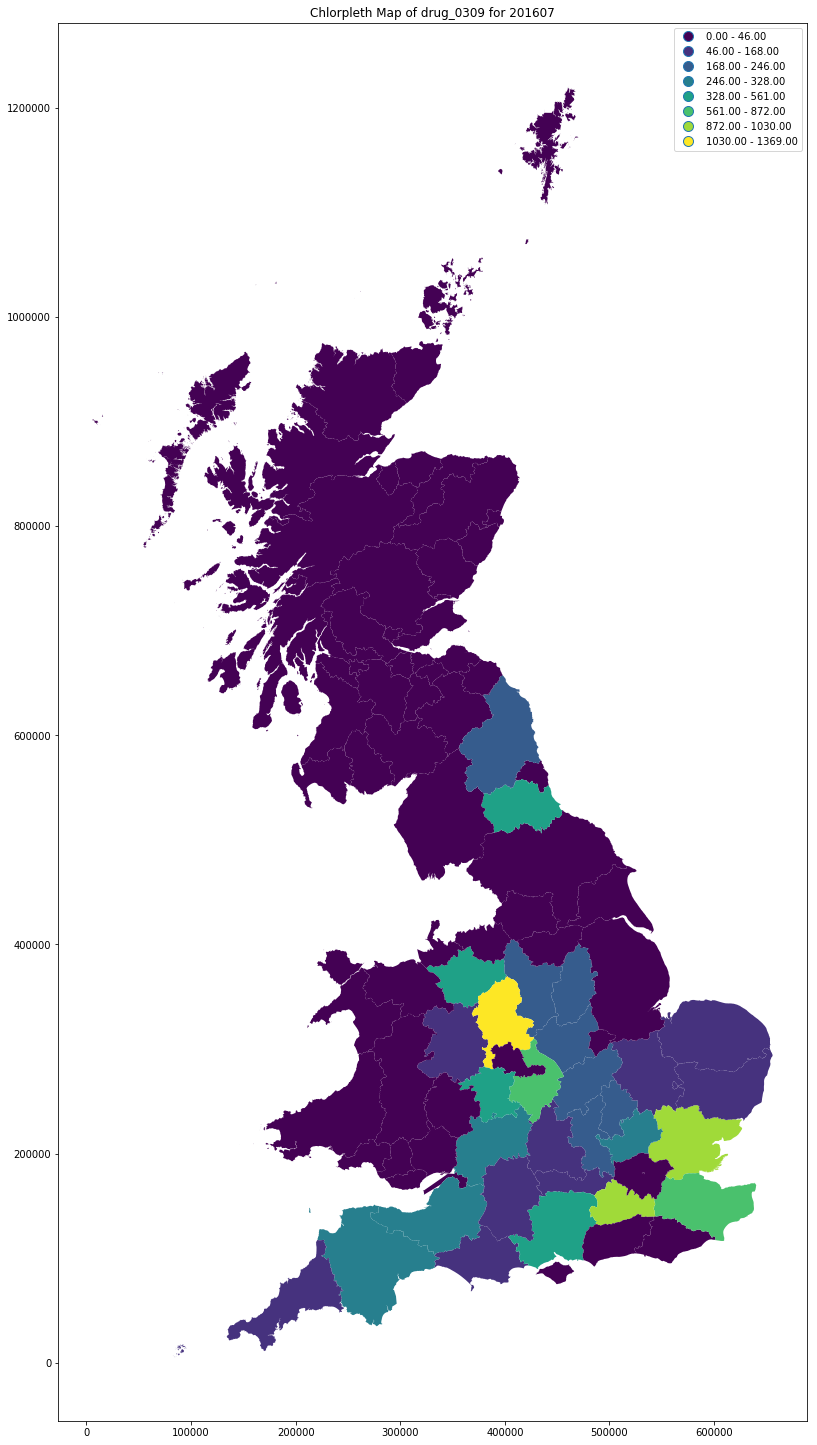

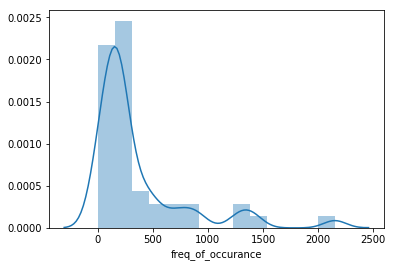

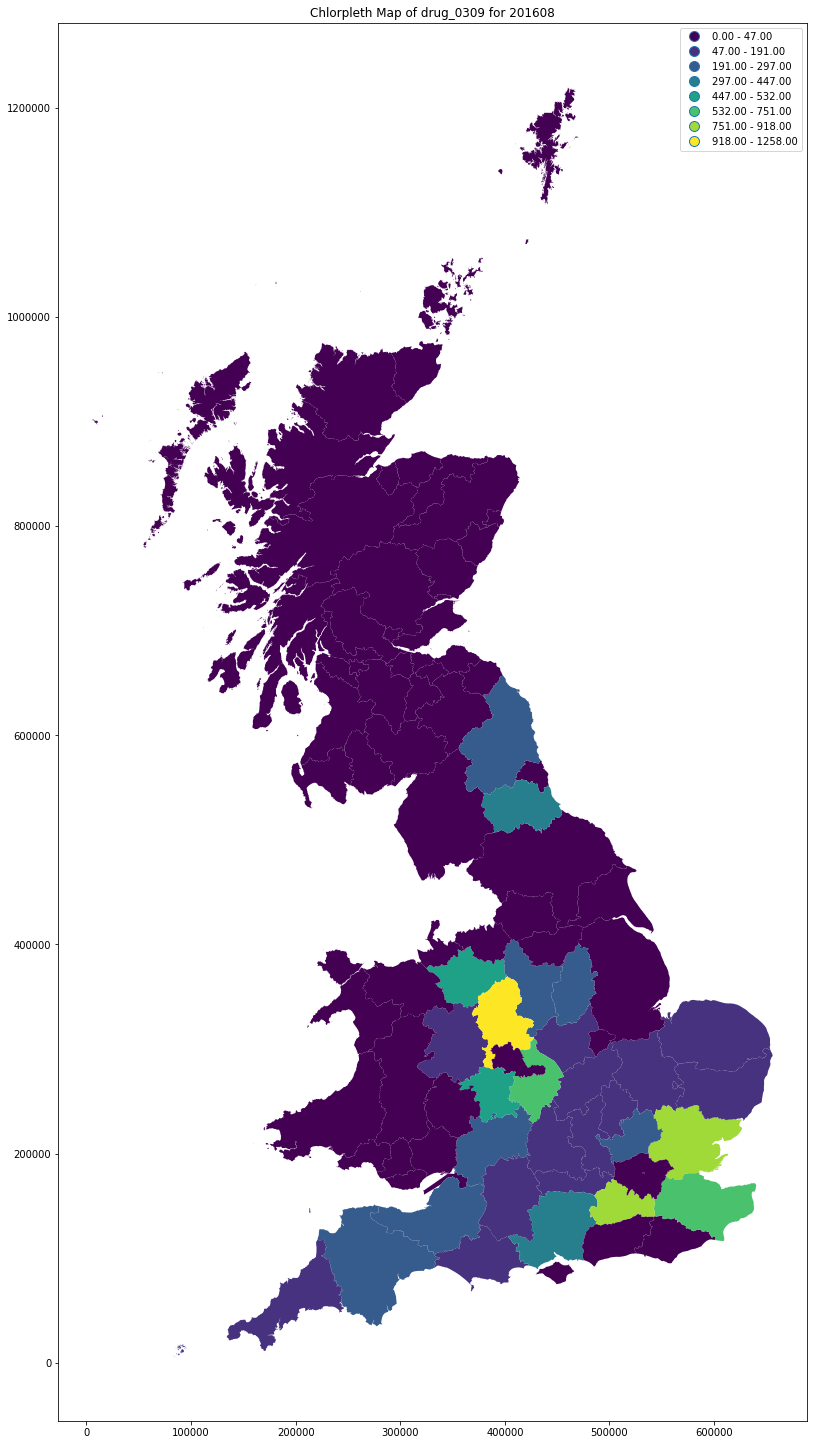

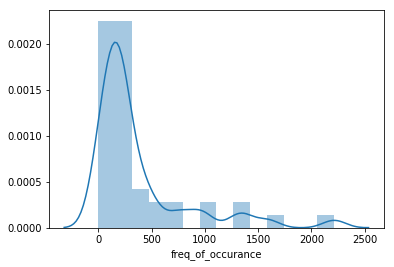

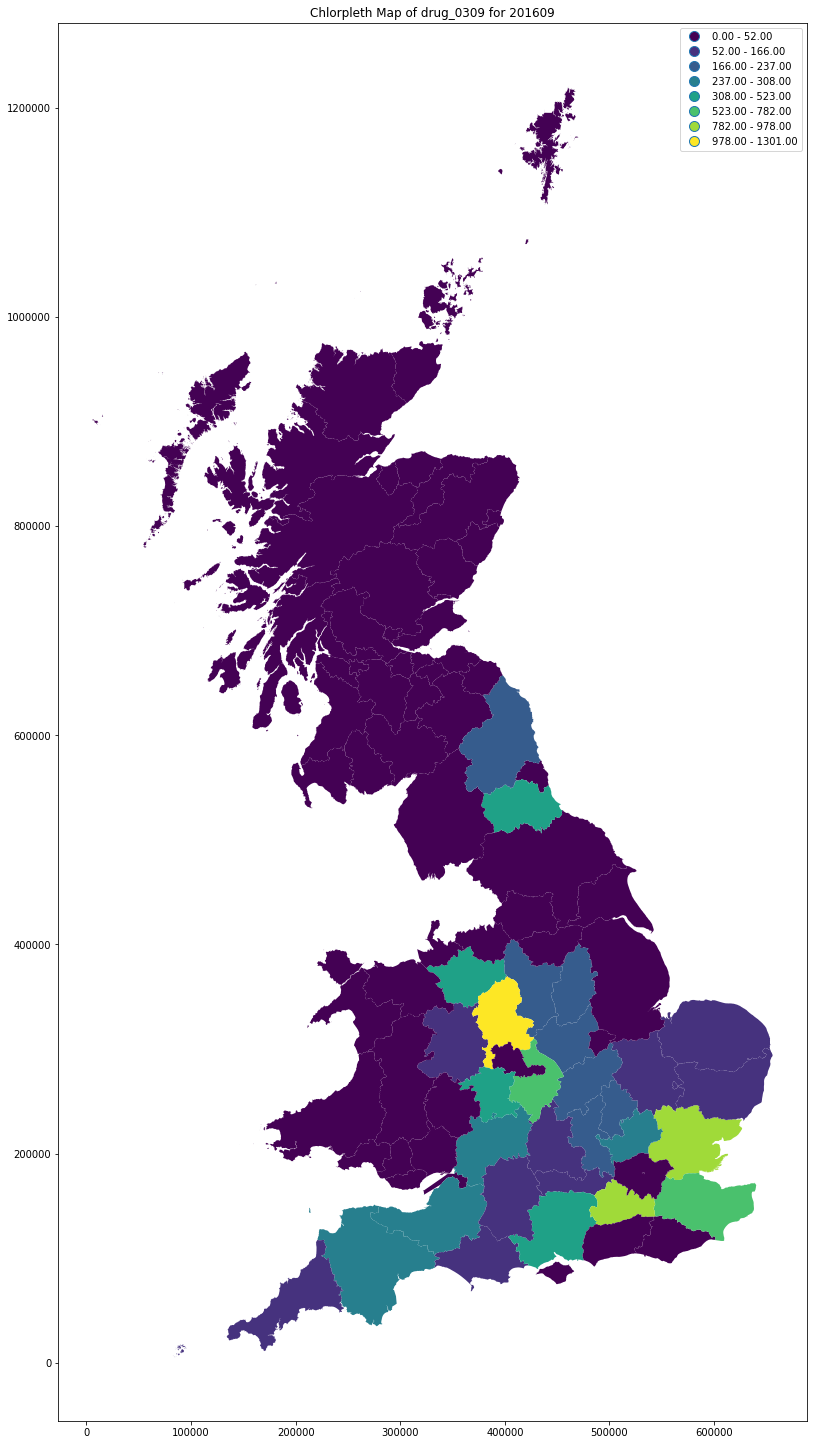

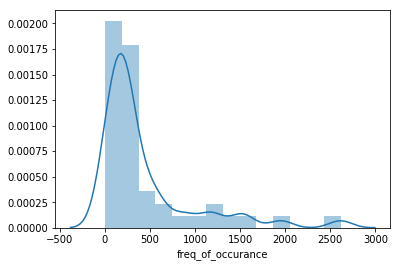

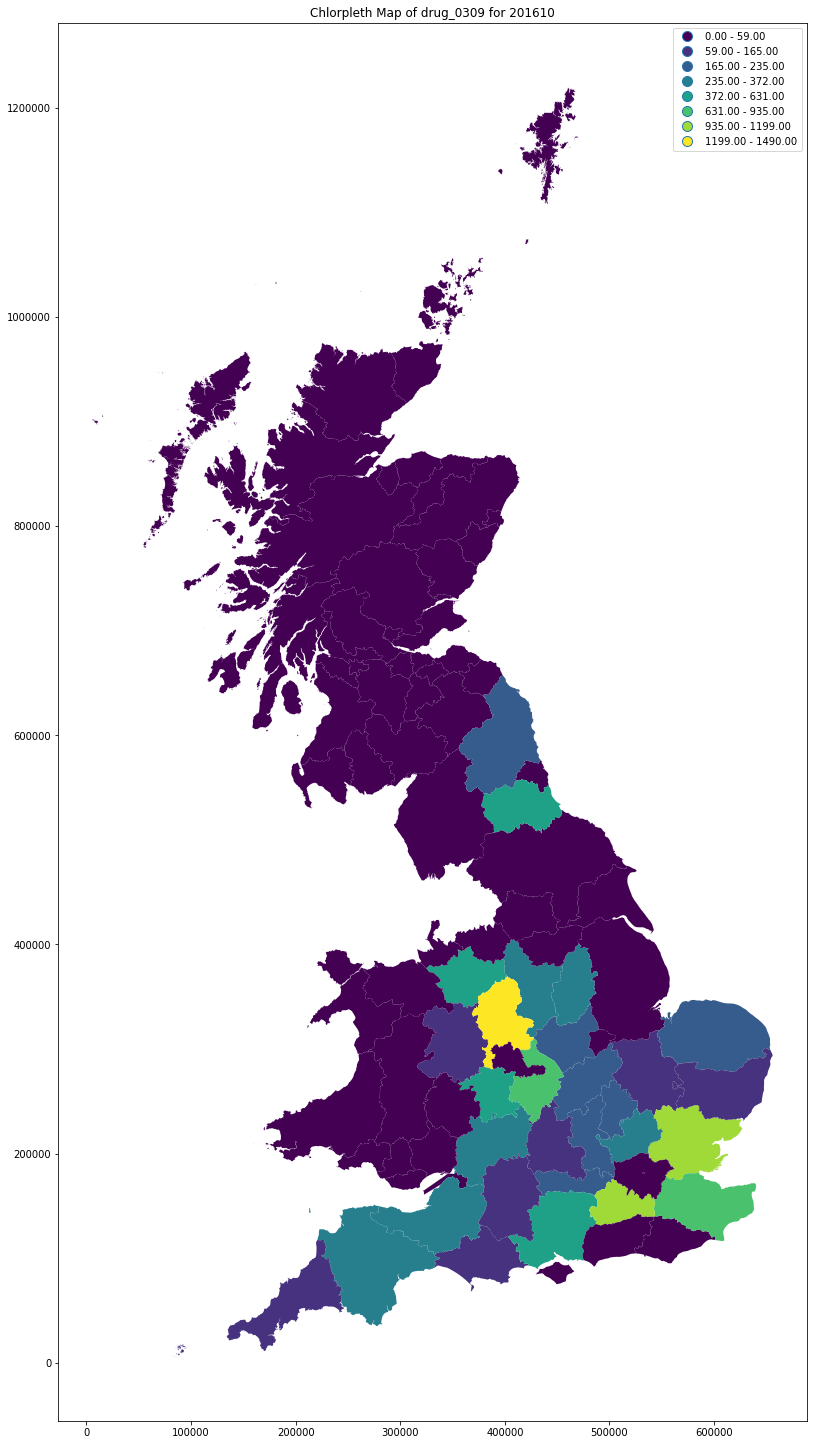

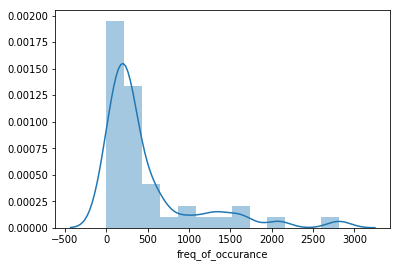

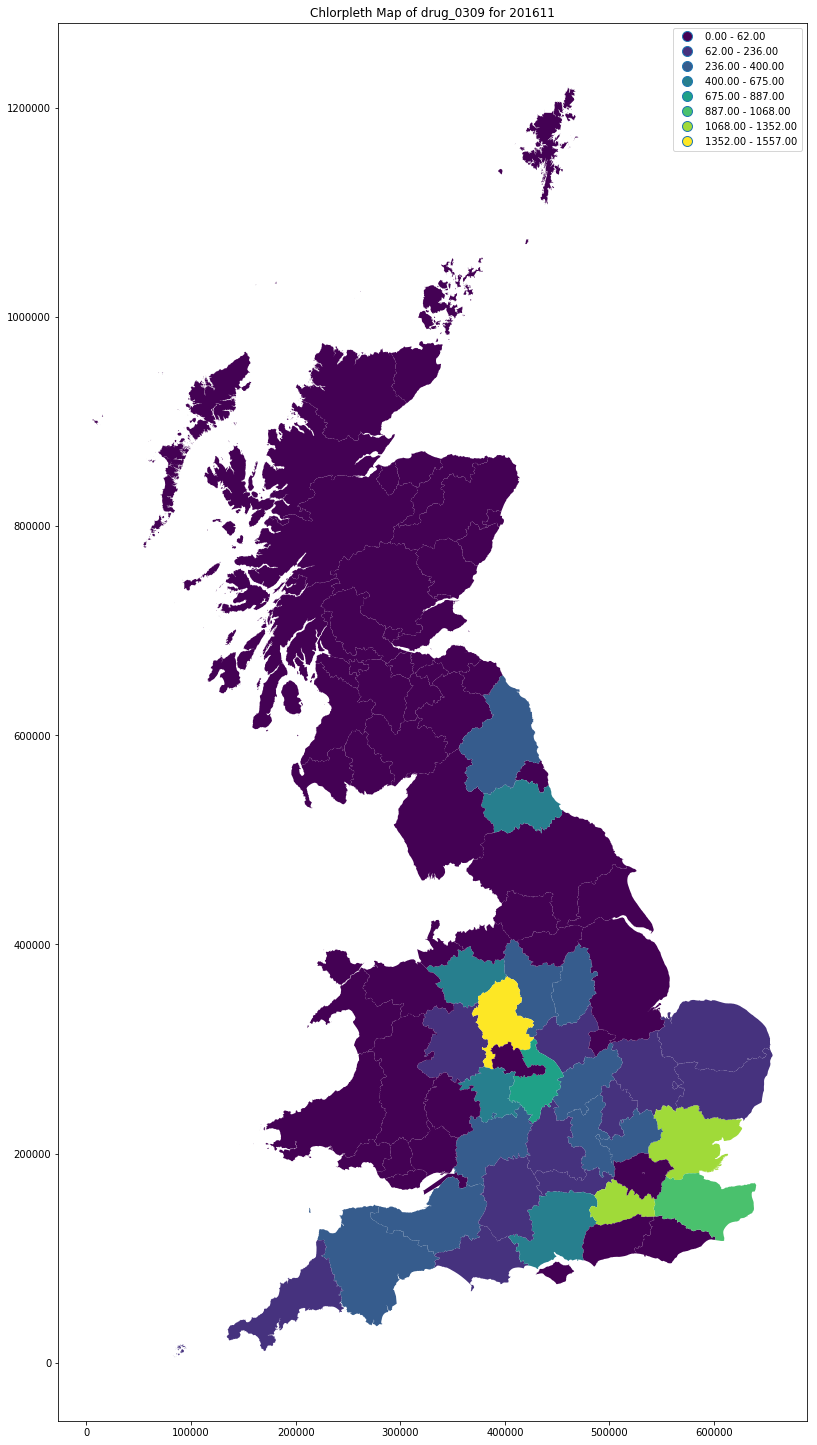

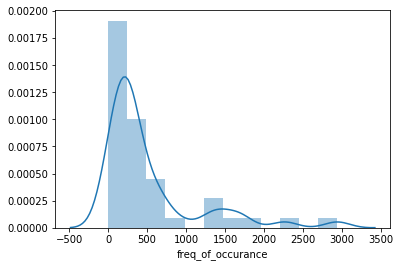

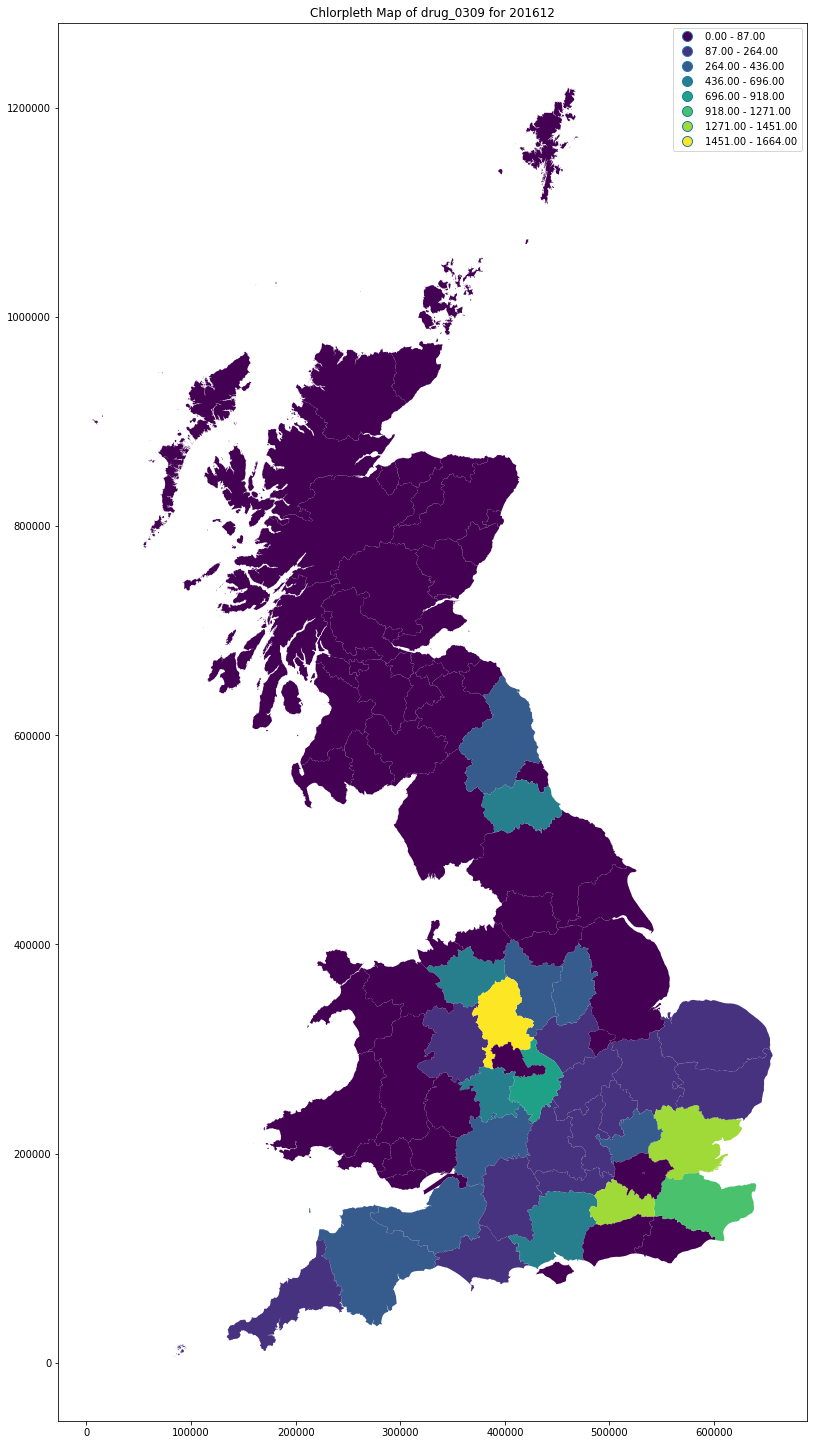

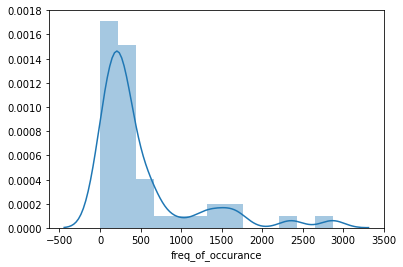

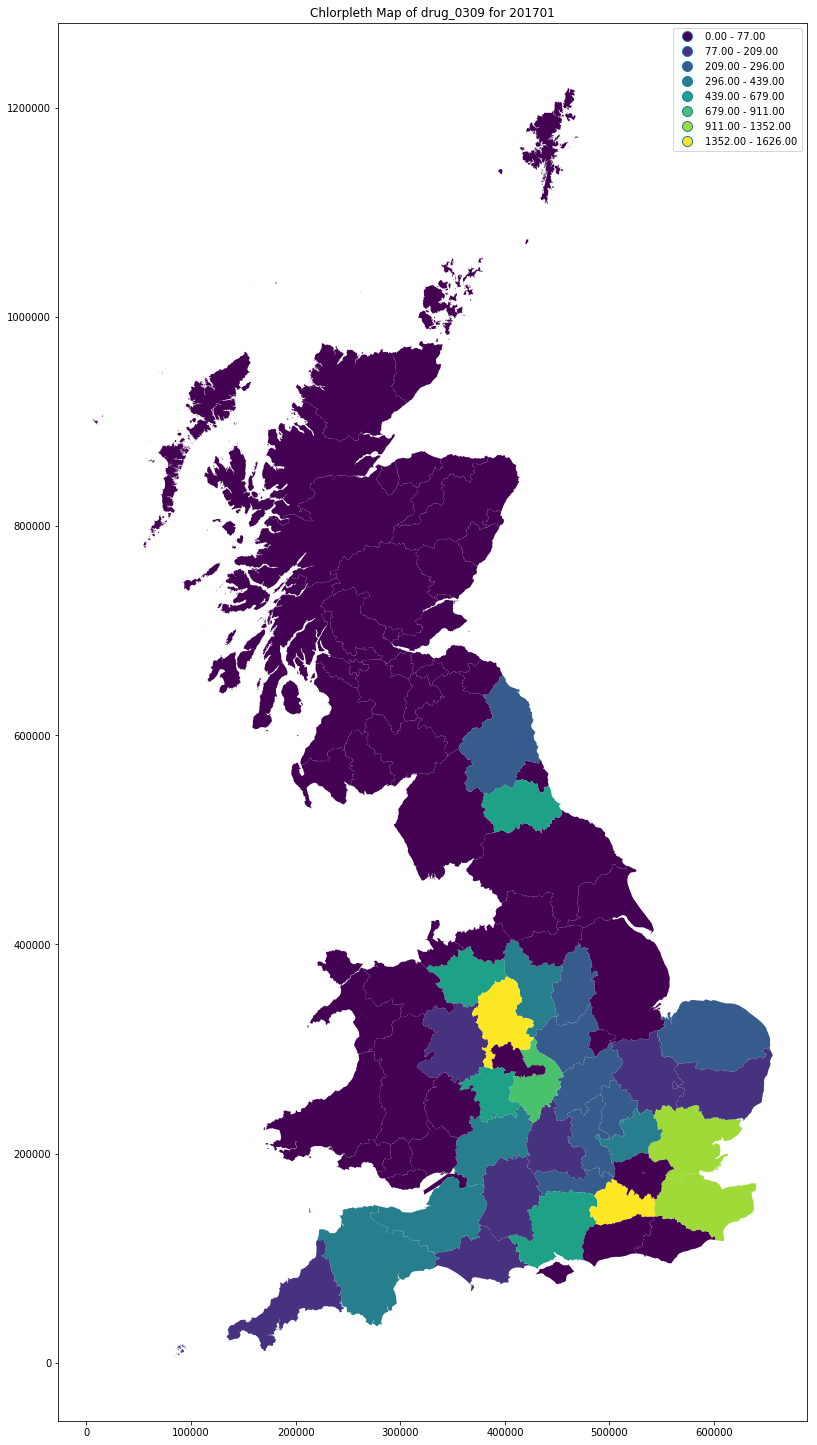

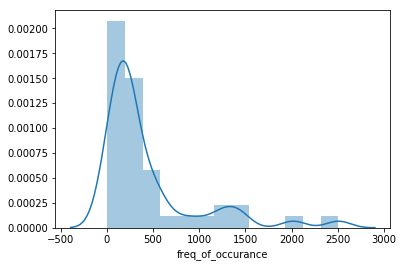

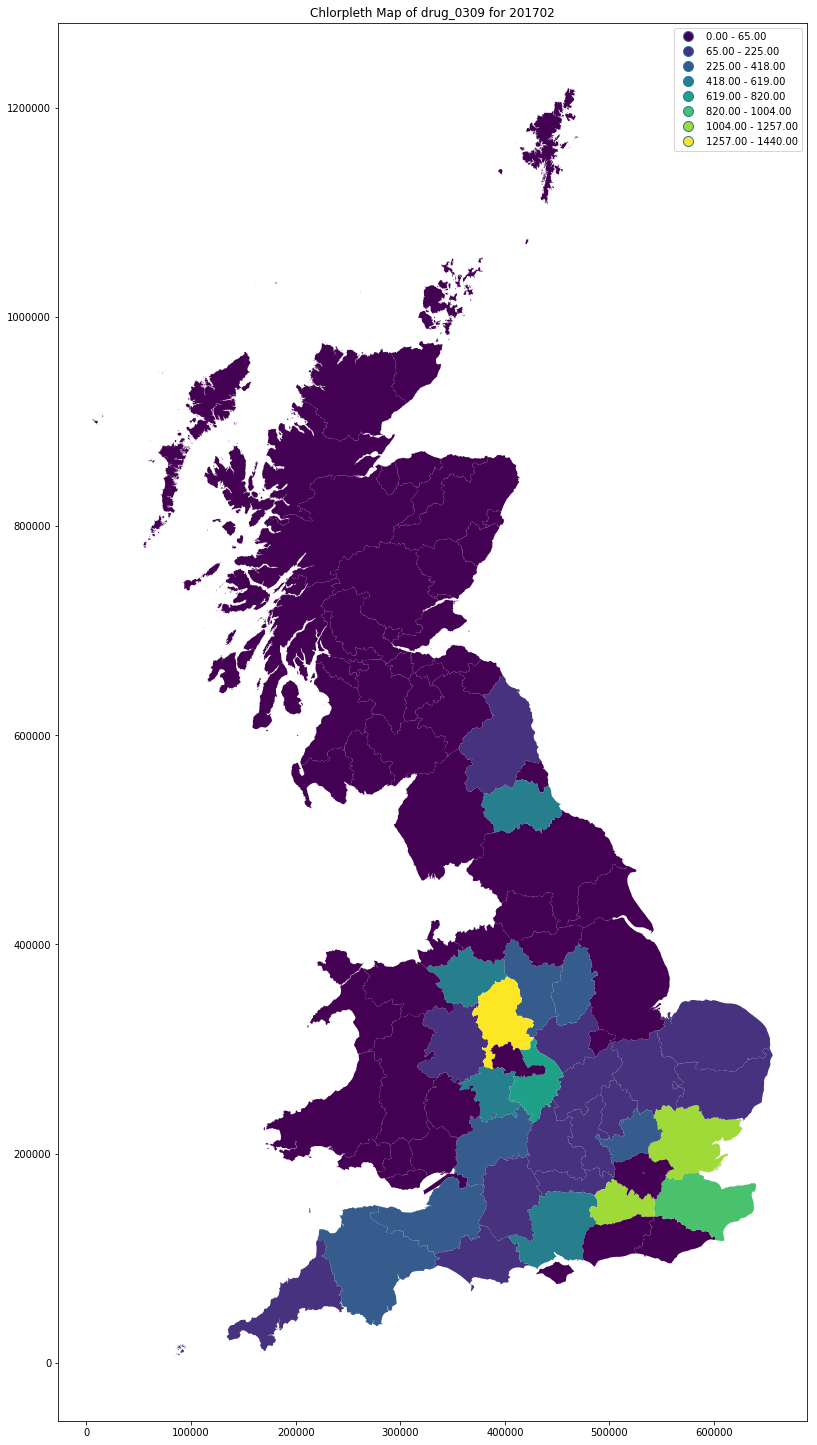

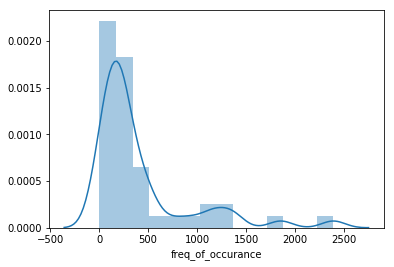

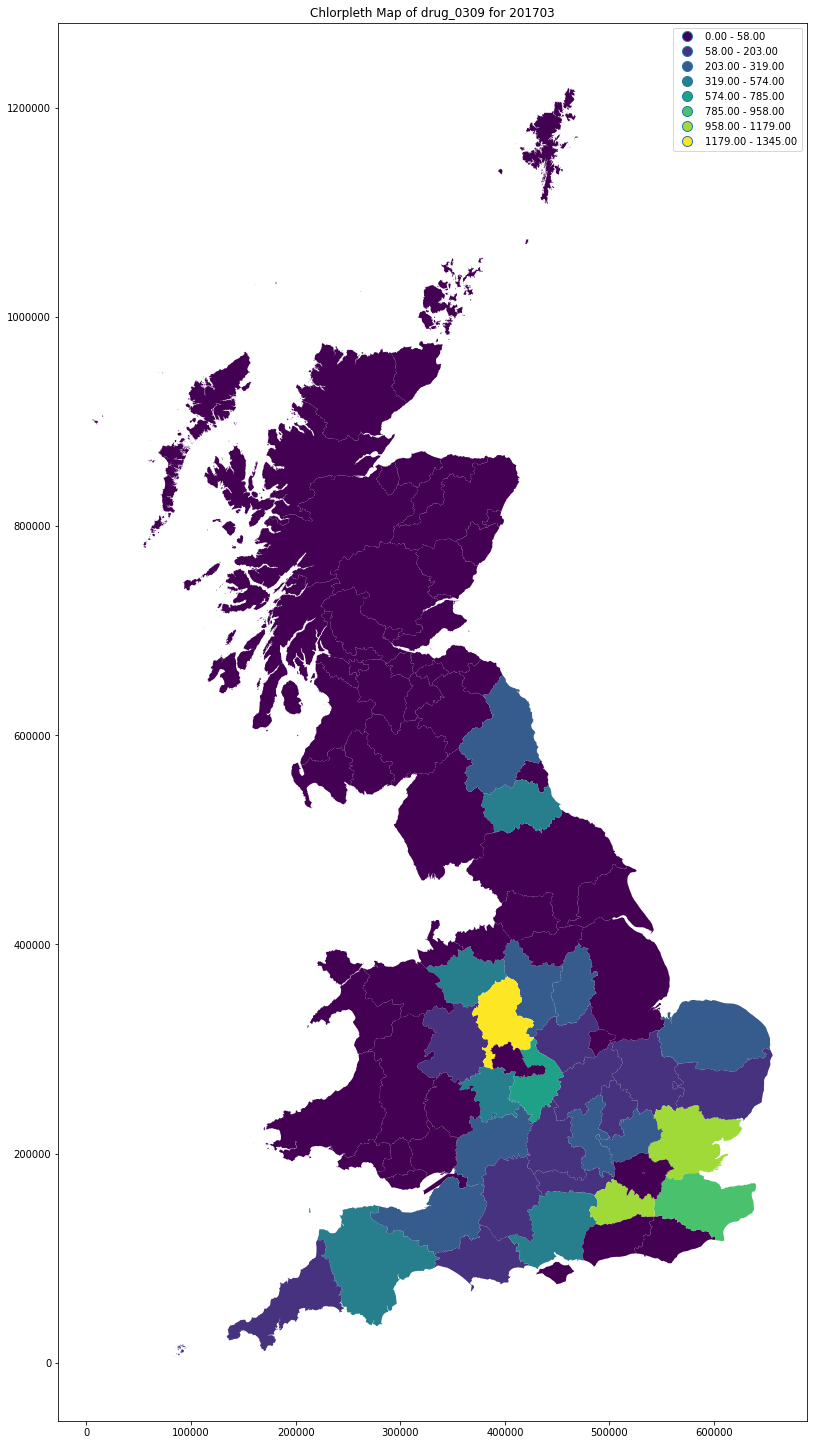

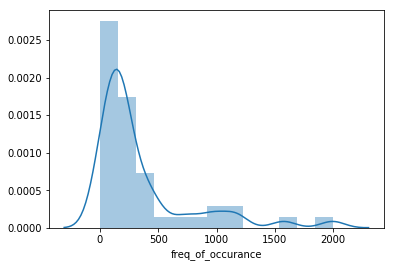

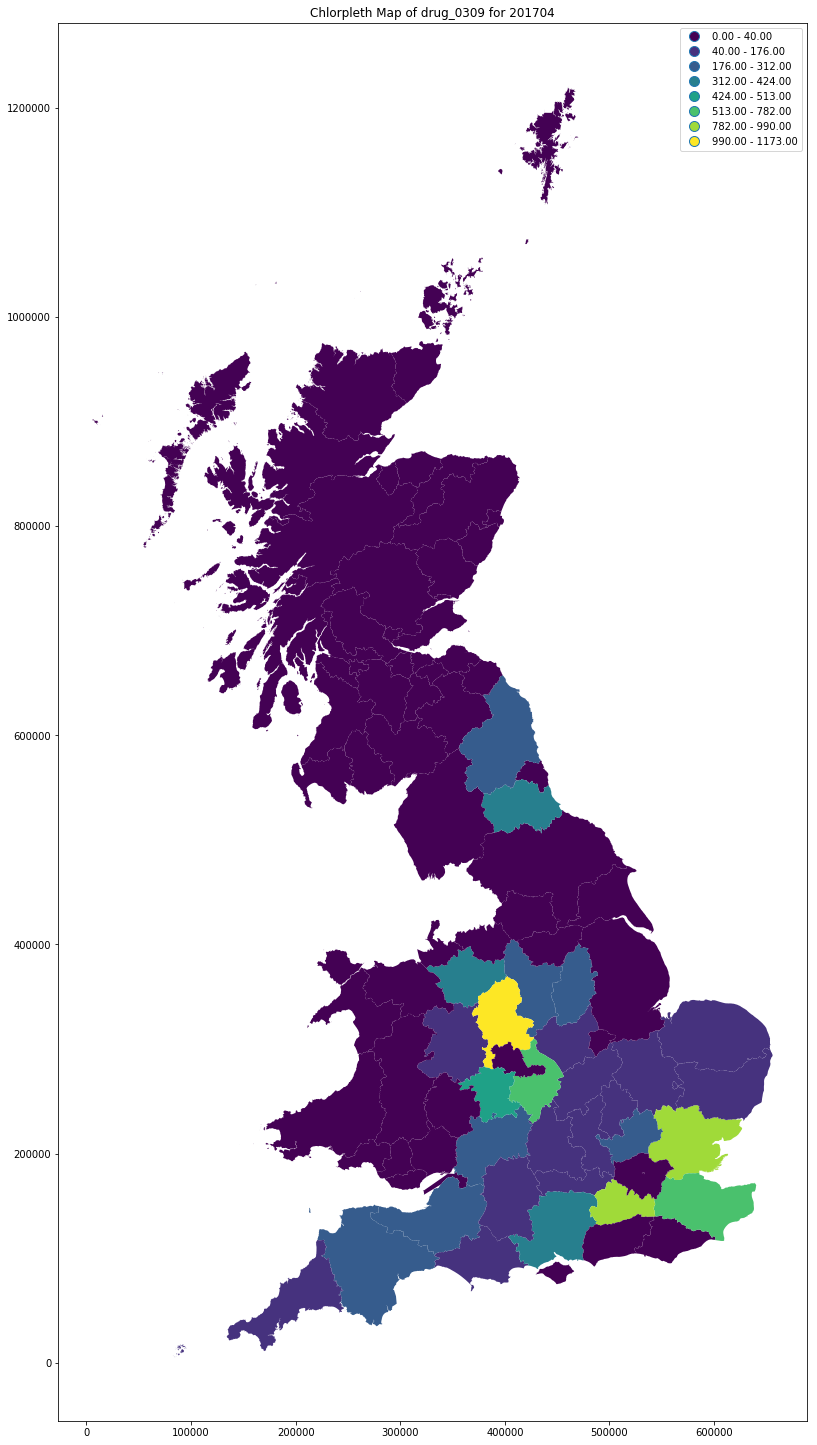

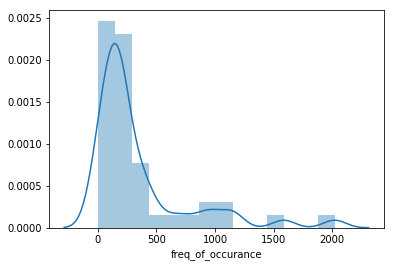

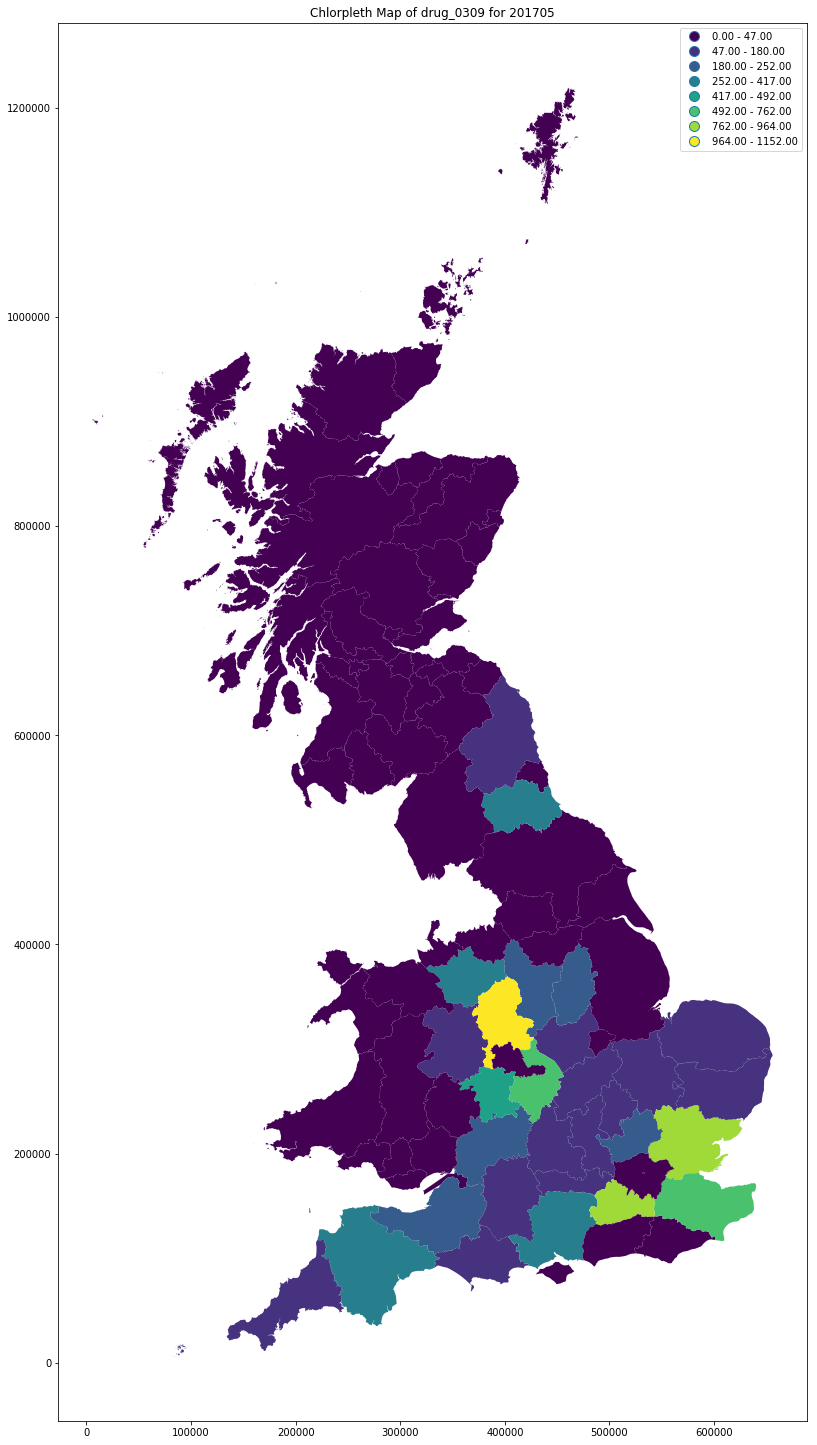

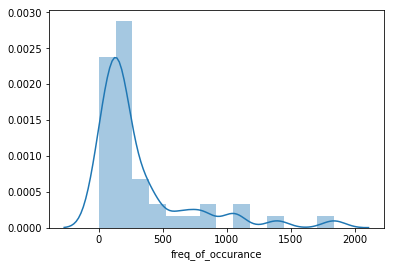

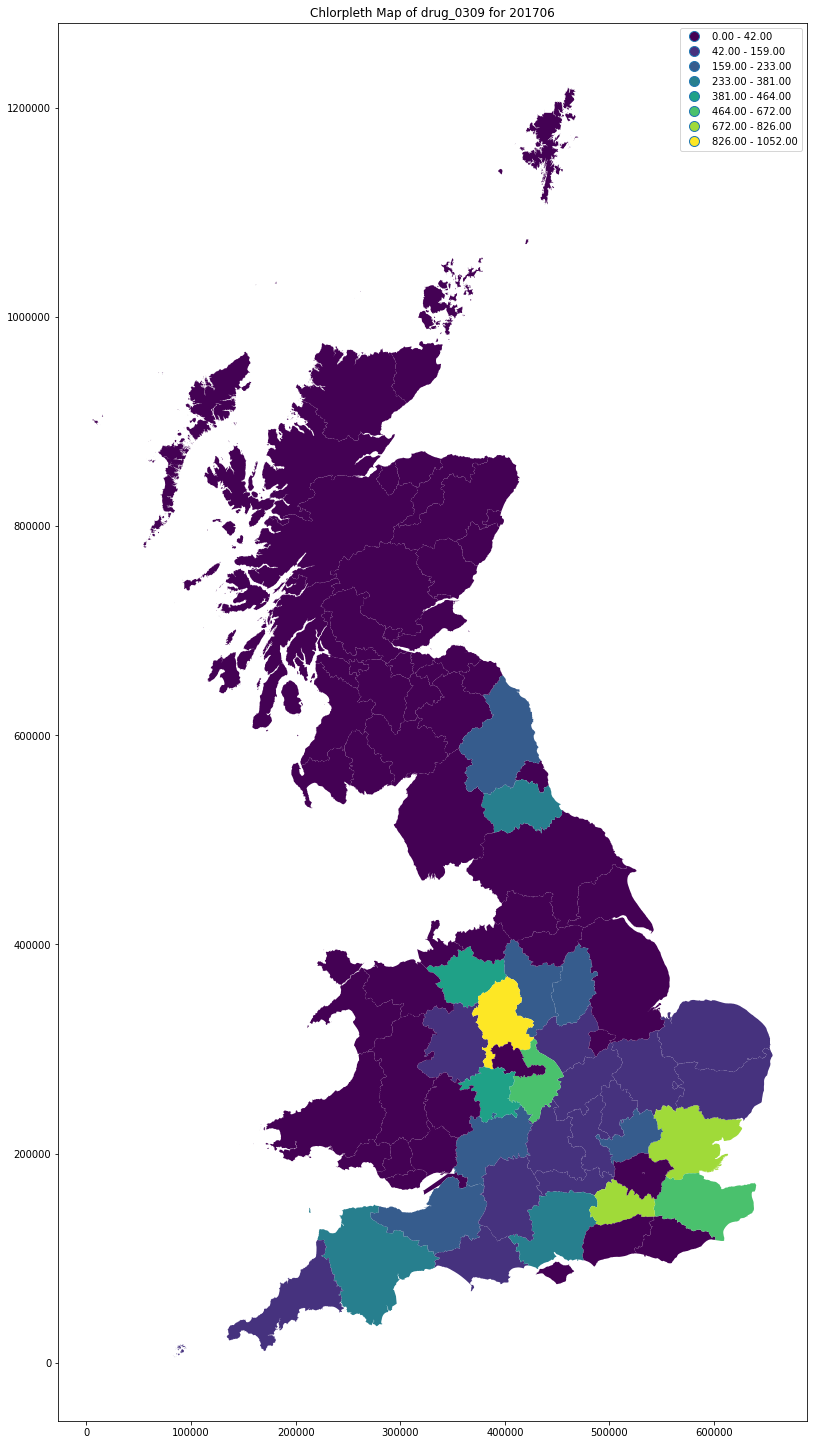

In [19]:
# now we do a  point in polygon analysis
# select specfic section 03 chapter 01

drug_code = "drug_0309"
frames = []
for t in pdpi_tables.tablename:
    query = "select practice from " + str(t) + " where chapter like '03' and section like '09';"
    print(query)
    
    start = time.time()
    df = pd.read_sql_query(query, con=engine)
    df["period"] = t.split("_")[-1]
    frames.append(df)
    print(time.time()-start)
    
    # merged the practice with its county
    merged_df = pd.merge(df, addr_index2, how="left", on="practice")
    merged_df.head()
    
    # get the county counts
    county_counts = merged_df["county"].value_counts()
    county_counts = pd.DataFrame(county_counts)
    county_counts = county_counts.reset_index()
    county_counts.columns = ["Name", "freq_of_occurance"]
    county_counts["Name"] = county_counts["Name"].str.lower().apply(remove_whitespace)
    county_counts["period"] = t.split("_")[-1]
    
    print(county_counts.head())
    
    plt.figure()
    sns.distplot(county_counts["freq_of_occurance"])
    plt.savefig("./hist/" + drug_code + t.split("_")[-1] + "_hist" + ".png")
    
    
#     # boundry_shape_file.merge with county
    merged_boundry = boundry_shape_file.merge(county_counts, on='Name', how="left")
    print(merged_boundry.shape)
    
    frames.append(county_counts)
    
#     #fill nan with zero -  county which have no occurances
    merged_boundry = merged_boundry.fillna(0)
    merged_boundry2 = merged_boundry[merged_boundry["Name"] != "lancashire"]
    
#     #chlorpleth map
#     #k = number of classes
    plt.figure()
    merged_boundry2.plot(column='freq_of_occurance', 
                    k=8, # number of classes
                    cmap='viridis', 
                    legend=True,
                    scheme='fisher_jenks',
                    figsize=(20,20),
                    linewidth=2.0)
    plt.tight_layout()
    plt.title("Chlorpleth Map of " + drug_code + " for " + t.split("_")[-1])
    plt.savefig("./choropleth_without/" + t.split("_")[-1]  + "_without_lancashire.png", bbox_inches='tight', pad_inches=0.2)

    

    
    
    
    



In [21]:

import imageio
import glob
images = []
filenames = sorted(glob.glob("./choropleth_without/*.png") )
print(filenames)
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('choropleth_timelapse.gif', images)
# \end{lstlisting}


['./choropleth_without/201601_without_lancashire.png', './choropleth_without/201602_without_lancashire.png', './choropleth_without/201603_without_lancashire.png', './choropleth_without/201604_without_lancashire.png', './choropleth_without/201605_without_lancashire.png', './choropleth_without/201606_without_lancashire.png', './choropleth_without/201607_without_lancashire.png', './choropleth_without/201608_without_lancashire.png', './choropleth_without/201609_without_lancashire.png', './choropleth_without/201610_without_lancashire.png', './choropleth_without/201611_without_lancashire.png', './choropleth_without/201612_without_lancashire.png', './choropleth_without/201701_without_lancashire.png', './choropleth_without/201702_without_lancashire.png', './choropleth_without/201703_without_lancashire.png', './choropleth_without/201704_without_lancashire.png', './choropleth_without/201705_without_lancashire.png', './choropleth_without/201706_without_lancashire.png']


In [22]:
from IPython.display import HTML
HTML('<img src="choropleth_timelapse.gif">')
